In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Importing all the basic libraries that are needed

In [218]:
df=pd.read_csv('train.csv')
dft=pd.read_csv('test.csv')

Taking in train and test data

In [219]:
df.head()

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0


In [220]:
df.tail()

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption
26491,34891,2017-06-23 19:00:00,-0.7,-15.0,1009.0,51.685,A,225.0
26492,34892,2017-06-23 20:00:00,-2.9,-11.4,1005.0,56.105,A,213.0
26493,34893,2017-06-23 21:00:00,-1.4,-12.9,995.0,61.275,A,213.0
26494,34894,2017-06-23 22:00:00,-2.9,-11.4,996.0,67.210,A,210.0
26495,34895,2017-06-23 23:00:00,-2.1,-11.4,1009.0,71.880,A,210.0


In [221]:
dft.head()

,ID,datetime,temperature,var1,pressure,windspeed,var2
0,552,2013-07-24 00:00:00,-10.0,-16.4,1011.0,263.280,A
1,553,2013-07-24 01:00:00,-10.0,-20.7,1011.0,267.175,A
2,554,2013-07-24 02:00:00,-10.7,-17.1,1003.0,269.555,A
3,555,2013-07-24 03:00:00,-13.6,-20.7,1008.0,273.060,A
4,556,2013-07-24 04:00:00,-10.7,-17.1,1006.0,1.765,A


In [222]:
dft.tail()

,ID,datetime,temperature,var1,pressure,windspeed,var2
8563,35059,2017-06-30 19:00:00,-5.7,-18.6,998.0,233.595,A
8564,35060,2017-06-30 20:00:00,-5.7,-17.1,995.0,238.780,A
8565,35061,2017-06-30 21:00:00,-7.1,-19.3,1004.0,244.325,A
8566,35062,2017-06-30 22:00:00,-6.4,-19.3,1008.0,247.470,A
8567,35063,2017-06-30 23:00:00,-5.0,-16.4,1001.0,250.600,A


Taking a look at the data of train and test thr header and footer

In [223]:
all_data_na = (df.isnull().sum() / len(df)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


checking if there is missing data or not in percentile...............Good no missing data 

In [224]:
print(df.shape)
print(dft.shape)

(26496, 8)
(8568, 7)


Checking the shape of data








First I am taking the basic 

In [225]:



df['datetime']=pd.to_datetime(df['datetime'])

I need to convert one of the date variable to date time so that I can extract mewaningful feature from it. 

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 8 columns):
ID                         26496 non-null int64
datetime                   26496 non-null datetime64[ns]
temperature                26496 non-null float64
var1                       26496 non-null float64
pressure                   26496 non-null float64
windspeed                  26496 non-null float64
var2                       26496 non-null object
electricity_consumption    26496 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 1.6+ MB


Just checking the variable type of the data.

In [227]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['hour'] = df['datetime'].dt.hour


Here I am breaking the datetime column into date , time , year. As in separate entity they are more useful.

In [228]:
df.head()

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption,year,month,hour
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0,2013,7,0
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0,2013,7,1
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0,2013,7,2
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0,2013,7,3
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0,2013,7,4


Ok now checking the distribution of the electricity_consumption

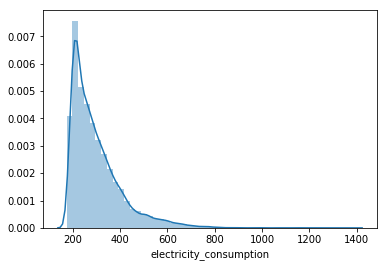

In [229]:
sns.distplot(df['electricity_consumption'])

With this histrogram I am trying to see the distribution of the electric_consumotion. As it can be seem its left
tilt completely. Therefore I need to run a log transform and it will help to spread the histogram and bring 
it close to normality.  

In [230]:
df["electricity_log"] = np.log1p(df["electricity_consumption"])

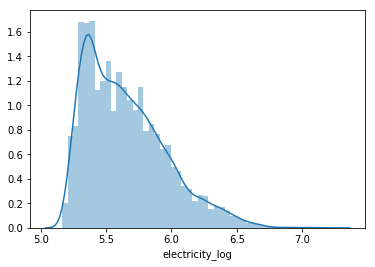

In [231]:
sns.distplot(df['electricity_log'])


Much better spread

Now working with temperatuer

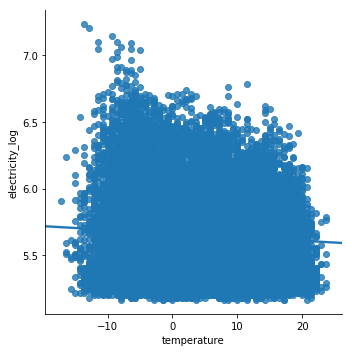

In [232]:
sns.lmplot(x='temperature',y='electricity_log' , data=df)

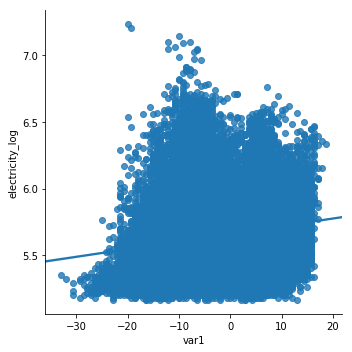

In [233]:
sns.lmplot(x='var1',y='electricity_log' , data=df)

it seems those 2 poins are outliers in all the variables in the 2 plots. I found if i remove them i am getting a metter result at a minimistic level

In [234]:


df.electricity_log.describe()

count    26496.000000
mean         5.649362
std          0.309572
min          5.164786
25%          5.393628
50%          5.590987
75%          5.837730
max          7.234898
Name: electricity_log, dtype: float64

Just checking the values that are above 7.

In [235]:
df = df.drop(df[df.electricity_log > 7 ].index)

Removing the 2 outliers and reploting them to check.

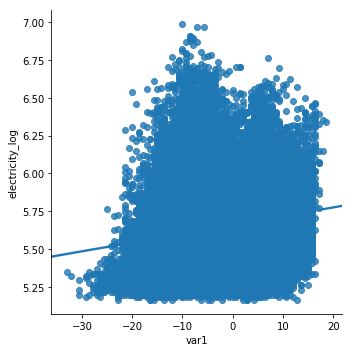

In [236]:
sns.lmplot(x='var1',y='electricity_log' , data=df)

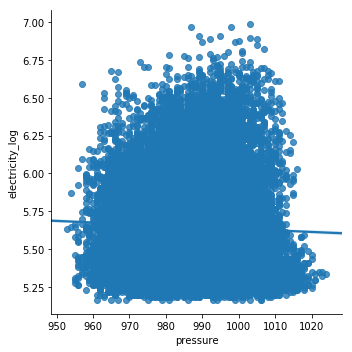

In [237]:
sns.lmplot(x='pressure',y='electricity_log' , data=df)

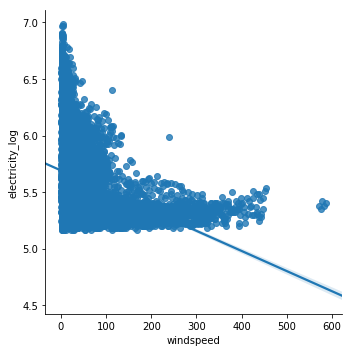

In [238]:
sns.lmplot(x='windspeed',y='electricity_log' , data=df)

here also we can see some points are concentrated at right angle. I tried to remove the outliars but it didnt help the 
model. So I used log transform and this did help.   

In [239]:
df["windspeed"] = np.log1p(df["windspeed"])

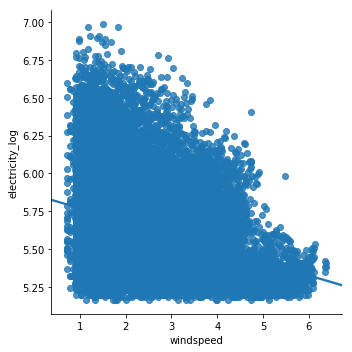

In [240]:
sns.lmplot(x='windspeed',y='electricity_log' , data=df)

In [241]:
df['var2'].value_counts()

A    25228
C     1040
B      217
Name: var2, dtype: int64

In [242]:
dft['var2'].value_counts()

A    8177
C     324
B      67
Name: var2, dtype: int64

In [243]:
d=pd.get_dummies(df['var2'], prefix='var2')
d.head()


,var2_A,var2_B,var2_C
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [244]:
d=d.drop(['var2_B'],1)
df=pd.concat([df,d],1)

In [245]:
df['year'].value_counts()

2016    6624
2014    6622
2015    6615
2013    3312
2017    3312
Name: year, dtype: int64

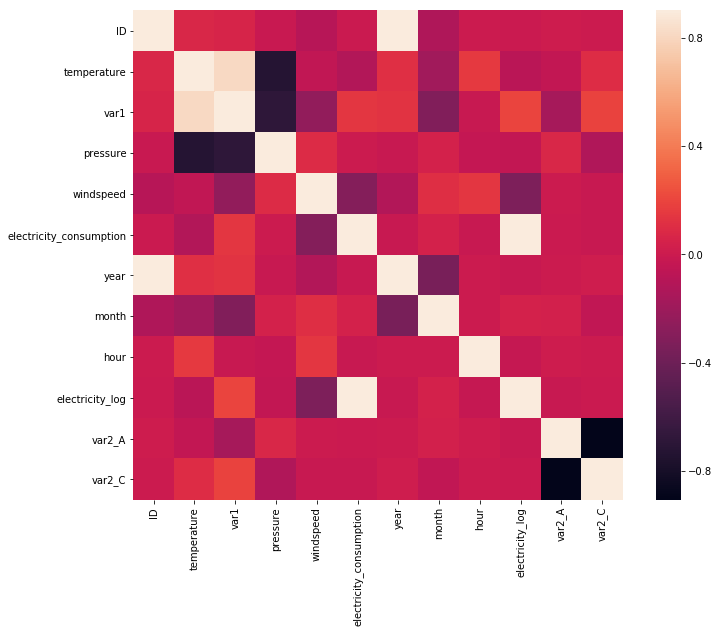

In [246]:
corrmat = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

Checking the corelation of the various variable. It helps to see any highly corelated variable and thereby remove them.

In [247]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 26485 entries, 0 to 26495
Data columns (total 14 columns):
ID                         26485 non-null int64
datetime                   26485 non-null datetime64[ns]
temperature                26485 non-null float64
var1                       26485 non-null float64
pressure                   26485 non-null float64
windspeed                  26485 non-null float64
var2                       26485 non-null object
electricity_consumption    26485 non-null float64
year                       26485 non-null int64
month                      26485 non-null int64
hour                       26485 non-null int64
electricity_log            26485 non-null float64
var2_A                     26485 non-null uint8
var2_C                     26485 non-null uint8
dtypes: datetime64[ns](1), float64(6), int64(4), object(1), uint8(2)
memory usage: 3.9+ MB


In [248]:
df['year'].value_counts()

2016    6624
2014    6622
2015    6615
2013    3312
2017    3312
Name: year, dtype: int64

In [249]:
yr=[2013,2014,2015,2016,2017]


In [250]:
df['month'].value_counts()


12    2208
11    2208
10    2208
9     2208
8     2208
6     2208
5     2208
4     2208
3     2208
2     2208
1     2208
7     2197
Name: month, dtype: int64

In [251]:
mts=np.array([7,8,9,10,11,12,1,2,3,4,5,6])
from sklearn.model_selection import cross_val_score
df=df.drop(['ID','datetime','var2','electricity_consumption'],1)

removing variables that are not needed and creating variable with year n month 

In [252]:
df.head()


,temperature,var1,pressure,windspeed,year,month,hour,electricity_log,var2_A,var2_C
0,-11.4,-17.1,1003.0,6.350729,2013,7,0,5.379897,1,0
1,-12.1,-19.3,996.0,6.356177,2013,7,1,5.351858,1,0
2,-12.9,-20.0,1000.0,6.362053,2013,7,2,5.420535,1,0
3,-11.4,-17.1,995.0,6.369182,2013,7,3,5.379897,1,0
4,-11.4,-19.3,1005.0,6.376046,2013,7,4,5.407172,1,0


In [253]:
#y=df.electricity_log.values

In [254]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor

Here i am calling all the nessery modules that I will use for creating the model.

In [255]:
n_folds=3
def rmsle_cv(model,x,y):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(df.values)
    rmse= np.sqrt(-cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

function to check performance

LASSO Regression

In [256]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

Elasticnet

In [257]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.5, random_state=3))

Gradient Boosting Regression :

In [258]:
GBoost = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

Decission tree

In [259]:
ds = DecisionTreeRegressor(max_depth=3)

Random forest

In [260]:
rf= RandomForestRegressor(n_estimators=70, max_depth=8, n_jobs=-1, verbose=0, warm_start=True)

XGboost

In [261]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                              nthread = -1)

In [262]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)

In [263]:
averaged_models = AveragingModels(models = (ENet,model_xgb,rf,ds, GBoost,lasso))


the above lines contain the regressor model and their parameters then finnaly the fuction that would avg them. I did little bit of 
tuning manually but was taking lot of time so i removed the part from the code . I used random search and put the func below. 

In [203]:
yrr=yr
mtss=mts
q=pd.DataFrame()
qq=pd.DataFrame()
stk=pd.DataFrame()
temp=pd.DataFrame()
for i in yr:
    yrr=yr
mtss=mts
q=pd.DataFrame()
qq=pd.DataFrame()
stk=pd.DataFrame()
temp=pd.DataFrame()
for i in yr:
    print(i)
    t=df[df['year']==i]
    print(t.shape)
    for j in mts:
        l=df[df['month']==j]
        print ('month', l.shape)
        lx = df.loc[(df['year']==i) & (df['month']==j)]        
        print("shape" , lx.shape)
        q=pd.concat([q,lx],0)
        print ('q shape',q.shape)
        score = rmsle_cv(averaged_models, q.drop(['electricity_log'],1),q['electricity_log'])
        print("\nScore: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
        

2013
(3312, 10)
month (2208, 10)
shape (552, 10)
q shape (552, 10)

Lasso score: 0.1492 (0.0091)

month (2208, 10)
shape (552, 10)
q shape (1104, 10)

Lasso score: 0.2965 (0.1377)

month (2208, 10)
shape (552, 10)
q shape (1656, 10)

Lasso score: 0.2723 (0.0781)

month (2208, 10)
shape (552, 10)
q shape (2208, 10)

Lasso score: 0.3250 (0.0684)

month (2208, 10)
shape (552, 10)
q shape (2760, 10)

Lasso score: 0.4143 (0.0235)

month (2208, 10)
shape (552, 10)
q shape (3312, 10)

Lasso score: 0.2784 (0.0208)

month (2208, 10)
shape (0, 10)
q shape (3312, 10)

Lasso score: 0.2781 (0.0210)

month (2208, 10)
shape (0, 10)
q shape (3312, 10)

Lasso score: 0.2784 (0.0212)

month (2208, 10)
shape (0, 10)
q shape (3312, 10)

Lasso score: 0.2785 (0.0210)

month (2208, 10)
shape (0, 10)
q shape (3312, 10)

Lasso score: 0.2782 (0.0209)

month (2208, 10)
shape (0, 10)
q shape (3312, 10)

Lasso score: 0.2779 (0.0209)

month (2208, 10)
shape (0, 10)
q shape (3312, 10)

Lasso score: 0.2783 (0.0209)

2

KeyboardInterrupt: 

Here i am testing the model. to see how its working 
As it is said i cant use future data to predict past so I decided to run a loop that will fit on
past data and then do prediction on the data of that month that year.
no future data will be used as loop will lock the date  

In [264]:
dft.head()

,ID,datetime,temperature,var1,pressure,windspeed,var2
0,552,2013-07-24 00:00:00,-10.0,-16.4,1011.0,263.280,A
1,553,2013-07-24 01:00:00,-10.0,-20.7,1011.0,267.175,A
2,554,2013-07-24 02:00:00,-10.7,-17.1,1003.0,269.555,A
3,555,2013-07-24 03:00:00,-13.6,-20.7,1008.0,273.060,A
4,556,2013-07-24 04:00:00,-10.7,-17.1,1006.0,1.765,A


In [265]:
dft['datetime']=pd.to_datetime(dft['datetime'])

In [266]:
dft['year'] = dft['datetime'].dt.year
dft['month'] = dft['datetime'].dt.month
dft['hour'] = dft['datetime'].dt.hour

In [267]:
d=pd.get_dummies(dft['var2'], prefix='var2')
d.head()
d=d.drop(['var2_B'],1)
dft=pd.concat([dft,d],1)
dft['year'].value_counts()
pq=pd.DataFrame()
pq['ID']=dft['ID']
dft=dft.drop(['ID','datetime','var2'],1)
dft["windspeed"] = np.log1p(dft["windspeed"])
#stacked_pred = np.expm1(averaged_models.predict(dft.values))

In [269]:
dft.head()

,temperature,var1,pressure,windspeed,year,month,hour,var2_A,var2_C
0,-10.0,-16.4,1011.0,5.577009,2013,7,0,1,0
1,-10.0,-20.7,1011.0,5.591640,2013,7,1,1,0
2,-10.7,-17.1,1003.0,5.600475,2013,7,2,1,0
3,-13.6,-20.7,1008.0,5.613347,2013,7,3,1,0
4,-10.7,-17.1,1006.0,1.017041,2013,7,4,1,0


In [270]:
df.head()

,temperature,var1,pressure,windspeed,year,month,hour,electricity_log,var2_A,var2_C
0,-11.4,-17.1,1003.0,6.350729,2013,7,0,5.379897,1,0
1,-12.1,-19.3,996.0,6.356177,2013,7,1,5.351858,1,0
2,-12.9,-20.0,1000.0,6.362053,2013,7,2,5.420535,1,0
3,-11.4,-17.1,995.0,6.369182,2013,7,3,5.379897,1,0
4,-11.4,-19.3,1005.0,6.376046,2013,7,4,5.407172,1,0


In [271]:
yrr=yr
mtss=mts
q=pd.DataFrame()
qq=pd.DataFrame()
stk=pd.DataFrame()
temp=pd.DataFrame()
for i in yr:
    print(i)
    t=df[df['year']==i]
    print(t.shape)
    for j in mts:
        l=df[df['month']==j]
        print ('month', l.shape)
        lx = df.loc[(df['year']==i) & (df['month']==j)]        
        print("shape" , lx.shape)
        q=pd.concat([q,lx],0)
        print ('q shape',q.shape)
        #score = rmsle_cv(lasso, q.drop(['electricity_log'],1),q['electricity_log'])
        #print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
        averaged_models.fit( q.drop(['electricity_log'],1),q['electricity_log'])   
           # acc=cross_val_score(estimator=lasso,X=q.drop(['electricity_log'],1),y=q['electricity_log'], cv=2)
        #print(acc)
    # score = rmsle_cv(lasso)
        #print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
        tt=dft[dft['year']==i]
        print(tt.shape)
        ll=dft[dft['month']==j]
        print ('month', l.shape)
        lxx = dft.loc[(dft['year']==i) & (dft['month']==j)]        
        print("shape " , lxx.shape)
        #qq=pd.concat([qq,lxx],0)
        if (lxx.shape==(0,9)):
            pass
        else:
            #print ('q shape',q.shape)
            stacked_pred = np.expm1(averaged_models.predict(lxx))
        temp=pd.DataFrame(stacked_pred)
        stk=pd.concat([stk,temp],0)
        stacked_pred= []
        stk.reset_index()
        

2013
(3312, 10)
month (2197, 10)
shape (552, 10)
q shape (552, 10)
(1104, 9)
month (2197, 10)
shape  (192, 9)
month (2208, 10)
shape (552, 10)
q shape (1104, 10)
(1104, 9)
month (2208, 10)
shape  (192, 9)
month (2208, 10)
shape (552, 10)
q shape (1656, 10)
(1104, 9)
month (2208, 10)
shape  (168, 9)
month (2208, 10)
shape (552, 10)
q shape (2208, 10)
(1104, 9)
month (2208, 10)
shape  (192, 9)
month (2208, 10)
shape (552, 10)
q shape (2760, 10)
(1104, 9)
month (2208, 10)
shape  (168, 9)
month (2208, 10)
shape (552, 10)
q shape (3312, 10)
(1104, 9)
month (2208, 10)
shape  (192, 9)
month (2208, 10)
shape (0, 10)
q shape (3312, 10)
(1104, 9)
month (2208, 10)
shape  (0, 9)
month (2208, 10)
shape (0, 10)
q shape (3312, 10)
(1104, 9)
month (2208, 10)
shape  (0, 9)
month (2208, 10)
shape (0, 10)
q shape (3312, 10)
(1104, 9)
month (2208, 10)
shape  (0, 9)
month (2208, 10)
shape (0, 10)
q shape (3312, 10)
(1104, 9)
month (2208, 10)
shape  (0, 9)
month (2208, 10)
shape (0, 10)
q shape (3312, 10)
(

In [ ]:
this is the final fit n prediction i kept the dummy variables just in case anyone wants to check my algo . 
It simply is taking the data based on date n month and avoiding future date to include in prediction.

In [272]:
stk.to_csv('out.csv', index=False)

In [273]:
l=pd.read_csv()

In [274]:
l.head()

,0
0,207.746255
1,197.745218
2,211.211208
3,200.758846
4,243.456579


In [275]:
pq.head()

,ID
0,552
1,553
2,554
3,555
4,556


In [276]:
pq['electricity_consumption']=l

In [277]:
pq.tail()

,ID,electricity_consumption
8563,35059,205.144039
8564,35060,209.460706
8565,35061,206.847801
8566,35062,204.943590
8567,35063,212.424892


For some reason concat and normal way of joining was not working and giving me error so i had to do little work around to attach the id with the result 

In [278]:
pq.head()

,ID,electricity_consumption
0,552,207.746255
1,553,197.745218
2,554,211.211208
3,555,200.758846
4,556,243.456579


In [280]:
pq.to_csv('Final_result.csv', index=False)